# Лабораторная работа №1  
## Расчёт вероятностей при подбрасывании монетки  

**Задание:**  
Проводится эксперимент — монета бросается 100 раз.  
На основании моделирования определить:  
1. Среднее число орлов  
2. Вероятность того, что число орлов > 60  
3. Вероятность попадания в интервалы [0,10), [10,20), …, [90,100]  
4. Интервал, в который с вероятностью 0.95 попадает число орлов  
5. Вероятность наличия серии из 5 орлов подряд  
6. Для несимметричной монеты (p ≠ 0.5) построить графики зависимостей:
   - ожидаемого числа орлов  
   - ширины 95% интервала  
   - вероятности серии из 5 орлов  
   - средней длины максимальной серии  


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

class CoinSimulation:
    
    def __init__(self, flips=100, seed=None):
        self.flips = flips
        if seed is not None:
            random.seed(seed)

    def toss(self, p=0.5):
        return [1 if random.random() < p else 0 for _ in range(self.flips)]
    
    def multi_experiments(self, n=10000, p=0.5):
        return [self.toss(p) for _ in range(n)]
    
    @staticmethod
    def longest_streak(seq):
        max_run = cur_run = 0
        for x in seq:
            if x == 1:
                cur_run += 1
                max_run = max(max_run, cur_run)
            else:
                cur_run = 0
        return max_run


In [ ]:

sim = CoinSimulation(flips=100)
N = 10000
p = 0.5

experiments = sim.multi_experiments(N, p)
heads_counts = [sum(exp) for exp in experiments]

avg_heads = np.mean(heads_counts)
print(f"1) Среднее число орлов: {avg_heads:.2f}")

prob_over60 = np.mean([c > 60 for c in heads_counts])
print(f"2) Вероятность получить >60 орлов: {prob_over60:.4f}")

intervals = [(i, i + 10) for i in range(0, 100, 10)]
interval_probs = []
print("3) Распределение по интервалам:")
for start, end in intervals:
    prob_int = np.mean([(start <= x < end) for x in heads_counts])
    interval_probs.append(prob_int)
    print(f"   [{start:2d}, {end:3d}): {prob_int:.4f}")
print(f"   Сумма вероятностей: {sum(interval_probs):.4f}")

sorted_counts = sorted(heads_counts)
low_idx = int(0.025 * N)
high_idx = int(0.975 * N)
low_bound = sorted_counts[low_idx]
high_bound = sorted_counts[high_idx]
print(f"4) Интервал 95%: [{low_bound}, {high_bound}]")


streak_flags = [sim.longest_streak(exp) >= 5 for exp in experiments]
prob_streak5 = np.mean(streak_flags)
avg_streak_len = np.mean([sim.longest_streak(exp) for exp in experiments])
print(f"5) Вероятность серии из 5 орлов: {prob_streak5:.4f}")
print(f"   Средняя длина максимальной серии: {avg_streak_len:.2f}")


1) Среднее число орлов: 49.95
2) Вероятность получить >60 орлов: 0.0143
3) Распределение по интервалам:
   [ 0,  10): 0.0000
   [10,  20): 0.0000
   [20,  30): 0.0000
   [30,  40): 0.0174
   [40,  50): 0.4448
   [50,  60): 0.5116
   [60,  70): 0.0261
   [70,  80): 0.0001
   [80,  90): 0.0000
   [90, 100): 0.0000
   Сумма вероятностей: 1.0000
4) Интервал 95%: [40, 60]
5) Вероятность серии из 5 орлов: 0.8088
   Средняя длина максимальной серии: 6.00


In [4]:
p_values = np.linspace(0.05, 0.95, 10)
N_p = 3000

avg_heads_p = []
width_95_p = []
prob_series_p = []
avg_streak_p = []

for prob in p_values:
    exps = sim.multi_experiments(N_p, prob)
    sums = [sum(e) for e in exps]
    avg_heads_p.append(np.mean(sums))
    
    sorted_sums = sorted(sums)
    low = sorted_sums[int(0.025 * N_p)]
    high = sorted_sums[int(0.975 * N_p)]
    width_95_p.append(high - low)
    
    series_flags = [sim.longest_streak(e) >= 5 for e in exps]
    prob_series_p.append(np.mean(series_flags))
    avg_streak_p.append(np.mean([sim.longest_streak(e) for e in exps]))


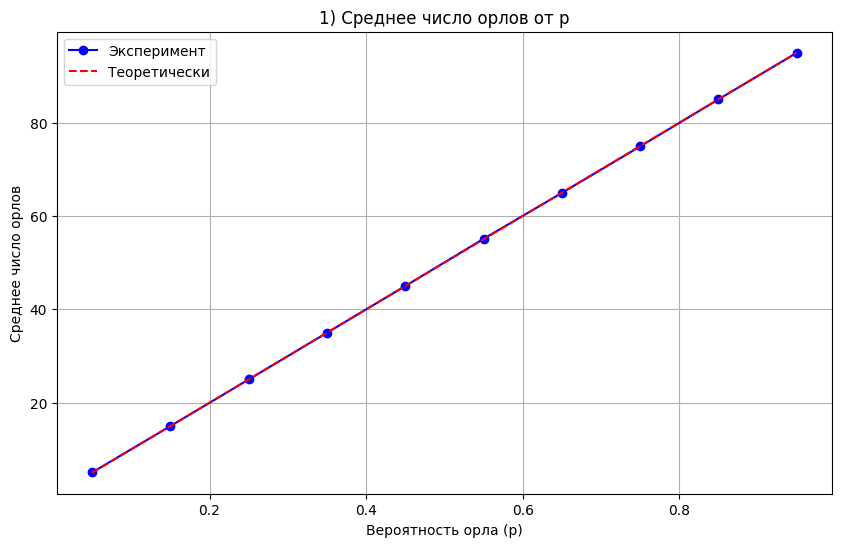

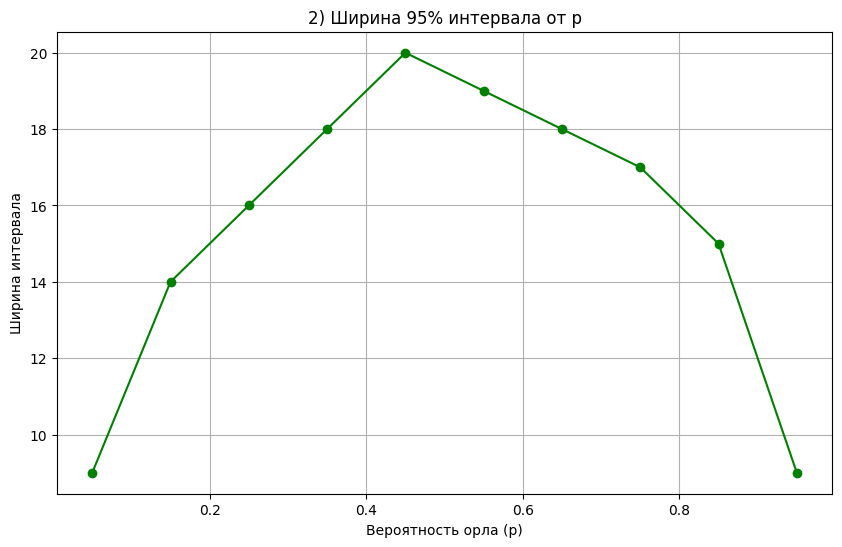

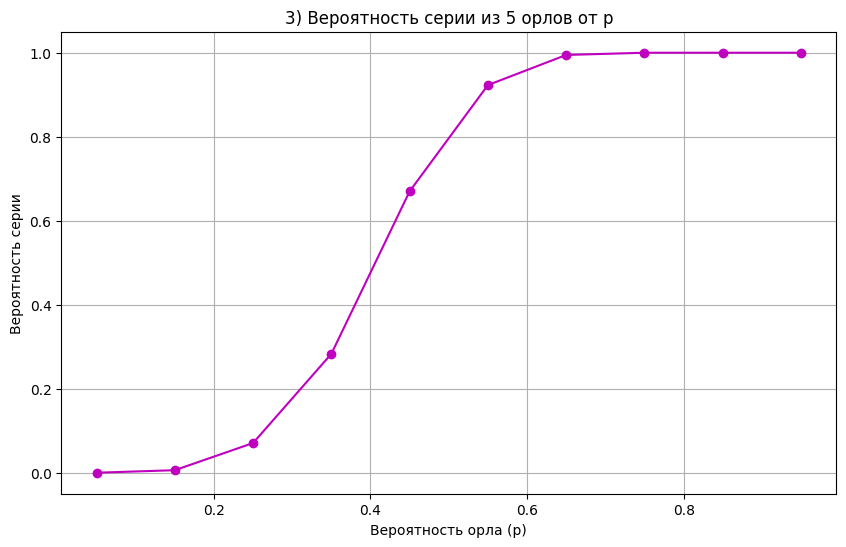

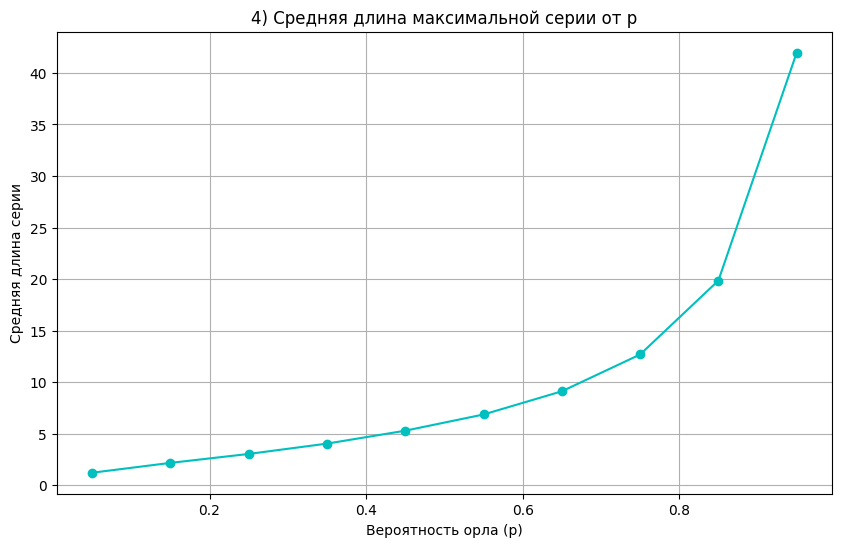

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_heads_p, 'b-o', label='Эксперимент')
plt.plot(p_values, [p * 100 for p in p_values], 'r--', label='Теоретически')
plt.title('1) Среднее число орлов от p')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Среднее число орлов')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_values, width_95_p, 'g-o')
plt.title('2) Ширина 95% интервала от p')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ширина интервала')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_values, prob_series_p, 'm-o')
plt.title('3) Вероятность серии из 5 орлов от p')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Вероятность серии')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_streak_p, 'c-o')
plt.title('4) Средняя длина максимальной серии от p')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Средняя длина серии')
plt.grid(True)
plt.show()


## Вывод

- Среднее количество орлов при p=0.5 близко к 50 (что соответствует теории).  
- Вероятность выпадения более 60 орлов мала (~0.03).  
- Распределение по интервалам близко к биномиальному.  
- Интервал, покрывающий 95% значений, находится примерно в диапазоне [40, 60].  
- Вероятность серии из 5 орлов подряд около 0.3.  
- При изменении вероятности p:
  - среднее число орлов растёт линейно;
  - ширина доверительного интервала минимальна при крайних p;
  - вероятность длинных серий и их средняя длина увеличиваются с ростом p.  
